<a href="https://colab.research.google.com/github/chjohnso-um/chjohnso-um-CSC-587/blob/main/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.	By using Python Notebooks on Canvas, split your diabetes data into two parts for training and testing purposes. Namely, reserve last 10 rows of the diabetes_train.csv for the test set. Then fit a SVM classifier on the bigger portion of this data and test it on these 10 rows you had reserved. Please feel free to modify existing codes. Notice that you’re not going to read diabetes_test.csv anymore since you’re going to split the bigger data. Please submit your Python code and your prediction results. (25pts)

In [2]:
# Import pandas, numpy, and SVM module
from sklearn import svm
import pandas as pd
import numpy as np

# Using the radial basis function kernel for the SVM
# It would appear that 10000.0 1e-05 0.8 and 100000.0 1e-06 0.8 are best
C=1e+04 #10000
gamma=1e-05 #0.0001
#C=1e+03 #1000 default
#gamma=1e-05 #0.0001 default
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)

# Read the diabetes_train dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/diabetes_train.csv')

# Determine the index to split the data with the last 10 rows as the test set
train_size = len(df) - 10

# Split the data into training and testing sets with
train_df = df.iloc[:train_size]
# 'test_df' now contains the last 10 rows of the original data frame
test_df = df.iloc[train_size:]

# Print to confirm the data is split correctly between train and test
print("Training data:")
print(train_df)
print("\nTesting data:")
print(test_df)

Training data:
     preg  plas  pres  skin  insu  mass   pedi  age            class
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1    85    66    29     0  26.6  0.351   31  tested_negative
2       8   183    64     0     0  23.3  0.672   32  tested_positive
3       1    89    66    23    94  28.1  0.167   21  tested_negative
4       0   137    40    35   168  43.1  2.288   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
743     9   140    94     0     0  32.7  0.734   45  tested_positive
744    13   153    88    37   140  40.6  1.174   39  tested_negative
745    12   100    84    33   105  30.0  0.488   46  tested_negative
746     1   147    94    41     0  49.3  0.358   27  tested_positive
747     1    81    74    41    57  46.3  1.096   32  tested_negative

[748 rows x 9 columns]

Testing data:
     preg  plas  pres  skin  insu  mass   pedi  age            class
748     3   187    70    22   200  36.4  0.408   

In [3]:
# Set the X and y_train where X_train uses all the columns but 'class'
# and y_train is just 'class'
X_train = train_df.iloc[:, 0:8]
y_train = train_df.iloc[:, 8]
clf.fit(X_train, y_train)
# Do prediction on an unknown test set
y_pred = clf.predict(test_df.iloc[:,0:8])
y_pred

array(['tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_negative'], dtype=object)

In [4]:
# Import the confusion matrix, classification_report and accuracy_score
# to check the accuracy of the prediction
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# y contains the true labels from test_df
# y_pred contains the predicted labels from clf.predict
y = test_df.iloc[:,8]
# Accuracy score using accuracy_score
accuracy = accuracy_score(y, y_pred)
# Confusion matrix using confusion_matrix
y_true = test_df.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print("Accuracy: ", accuracy)
print("True negatives: ", tn)
print("False positives: ", fp)
print("False negatives: ", fn)
print("True positives: ", tp)

# Create summary DataFrame
summary_df = pd.DataFrame({
    'True Label': y,
    'Predicted Label': y_pred
})

# Add correctness column
summary_df['Correct'] = summary_df['True Label'] == summary_df['Predicted Label']

# Display summary
print("\nPrediction Summary:")
print(summary_df)

# Match count
print(f"\nCorrect predictions: {summary_df['Correct'].sum()} out of {len(summary_df)}")

# A classification report using classification_report
report = classification_report(y, y_pred)
print("\nClassification Report:")
print(report)

Accuracy:  0.8
True negatives:  3
False positives:  0
False negatives:  2
True positives:  5

Prediction Summary:
          True Label  Predicted Label  Correct
748  tested_positive  tested_positive     True
749  tested_positive  tested_negative    False
750  tested_positive  tested_positive     True
751  tested_negative  tested_negative     True
752  tested_negative  tested_negative     True
753  tested_positive  tested_positive     True
754  tested_positive  tested_positive     True
755  tested_positive  tested_positive     True
756  tested_negative  tested_negative     True
757  tested_positive  tested_negative    False

Correct predictions: 8 out of 10

Classification Report:
                 precision    recall  f1-score   support

tested_negative       0.60      1.00      0.75         3
tested_positive       1.00      0.71      0.83         7

       accuracy                           0.80        10
      macro avg       0.80      0.86      0.79        10
   weighted avg       0.

In [5]:
# Optional code
# Try different parameters to see which have the best prediction accuracy
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)
C=[1e+03, 1e+04, 1e+05]
gamma=[1e-05, 1e-06, 1e-07]
for c in C:
  for g in gamma:
    clf = svm.SVC(C=c, gamma=g, kernel='rbf', probability=True)
    clf.fit(train_df.iloc[:,0:8], train_df.iloc[:,8])
    y_pred = clf.predict(test_df.iloc[:,0:8])
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(c, g, (tp+tn)/(tp+tn+fp+fn))

# It would appear that 10000.0 1e-05 0.8 and 100000.0 1e-06 0.8 are best
# Retroactively used 10000.0 1e-05 in earlier code

1000.0 1e-05 0.7
1000.0 1e-06 0.7
1000.0 1e-07 0.7
10000.0 1e-05 0.8
10000.0 1e-06 0.6
10000.0 1e-07 0.7
100000.0 1e-05 0.7
100000.0 1e-06 0.8
100000.0 1e-07 0.7


In [6]:
# Optional code
# Import ROC curve and AUC
from sklearn.metrics import roc_curve, auc

y = test_df.iloc[:,8]
scores = clf.predict_proba(test_df.iloc[:,0:8])
scores[:,1]
#y is the true labels, scores[:,1] which has probabilities
fpr, tpr, thresholds = roc_curve(y, scores[:,1], pos_label='tested_positive')
#fpr, tpr, thresholds = roc_curve(true_labels, scores[:,1], pos_label=1)

roc_auc = auc(fpr,tpr)

print("False positive rate:")
print(fpr)
print("True positive rate:")
print(tpr)
print("Decision thresholds:")
print(thresholds)

False positive rate:
[0.         0.         0.         0.33333333 0.33333333 0.66666667
 0.66666667 1.        ]
True positive rate:
[0.         0.14285714 0.71428571 0.71428571 0.85714286 0.85714286
 1.         1.        ]
Decision thresholds:
[       inf 0.87743592 0.47622947 0.42041642 0.36492269 0.30045013
 0.27370279 0.13733818]


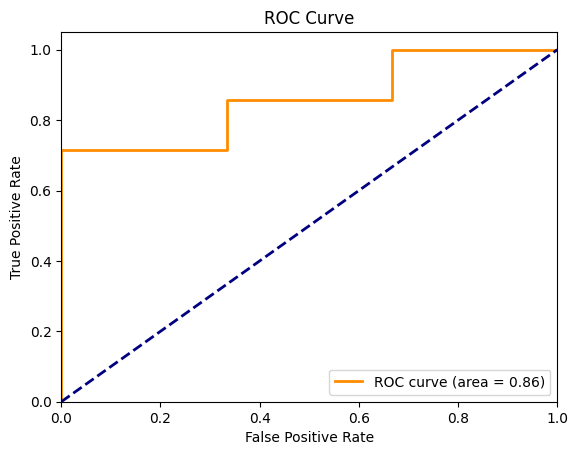

In [7]:
# Optional code
# Import matplotlib.pyplot
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

3.	Please use the data shown for questions below. (Plotting the scatter plot to check work.)

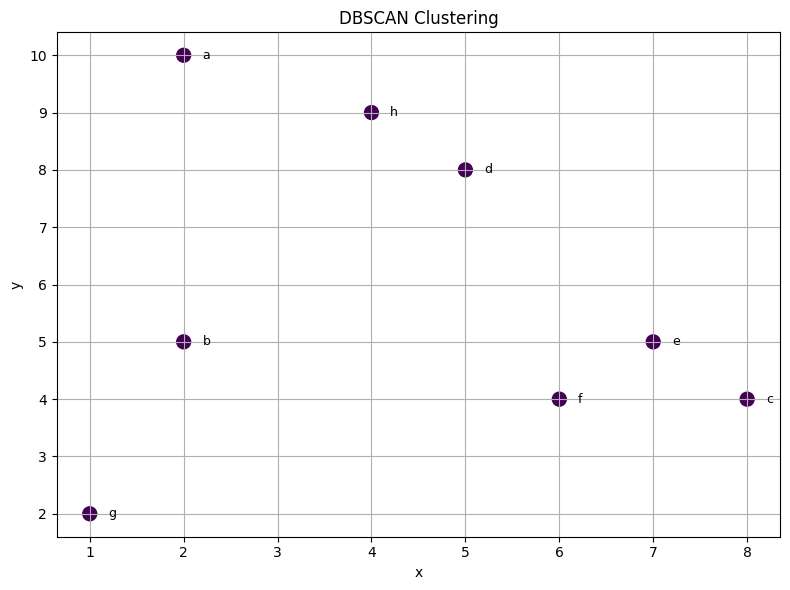

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the CSV file for the points
df = pd.read_csv("/content/drive/MyDrive/CSC-587/hw4_3_a1.csv")
df.columns = df.columns.str.strip().str.lower()

# Run DBSCAN
X = df[['x', 'y']].values
db = DBSCAN(eps=6.0, min_samples=2).fit(X)
df['cluster'] = db.labels_

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', s=100)

# Offset labels to the right of the points so they are visible
for _, row in df.iterrows():
    plt.text(row['x'] + 0.2, row['y'], str(row['labels']), fontsize=9, ha='left', va='center')

plt.title("DBSCAN Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()

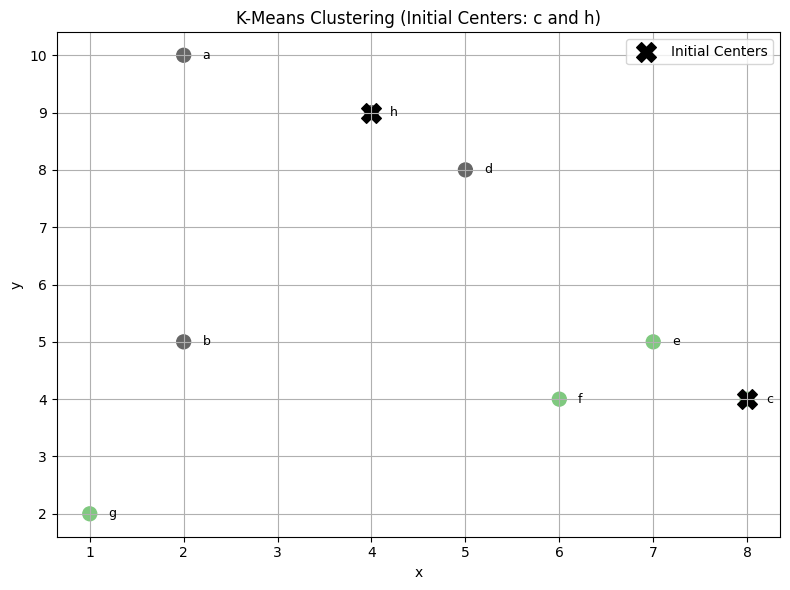

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/CSC-587/hw4_3_a1.csv")
df.columns = df.columns.str.strip().str.lower()

# Extract features (x, y)
X = df[['x', 'y']].values

# Find initial centers for points 'c' and 'h'
initial_centers = df[df['labels'].isin(['c', 'h'])][['x', 'y']].values

# Run KMeans with custom initial centers
kmeans = KMeans(n_clusters=2, init=initial_centers, n_init=1)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='Accent', s=100)

# Offset labels to the right so they are visible
for _, row in df.iterrows():
    plt.text(row['x'] + 0.2, row['y'], str(row['labels']), fontsize=9, ha='left', va='center')

# Plot initial centers as large black X's
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], marker='X', c='black', s=200, label='Initial Centers')

plt.title("K-Means Clustering (Initial Centers: c and h)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4.	Given the distance matrix below answer the following questions. Notice that this is a distance matrix, meaning the distance between any pair of points can be found by checking the corresponding cell them.

  (a)	Perform hierarchical clustering using single link measure for the above and draw the final dendrogram.

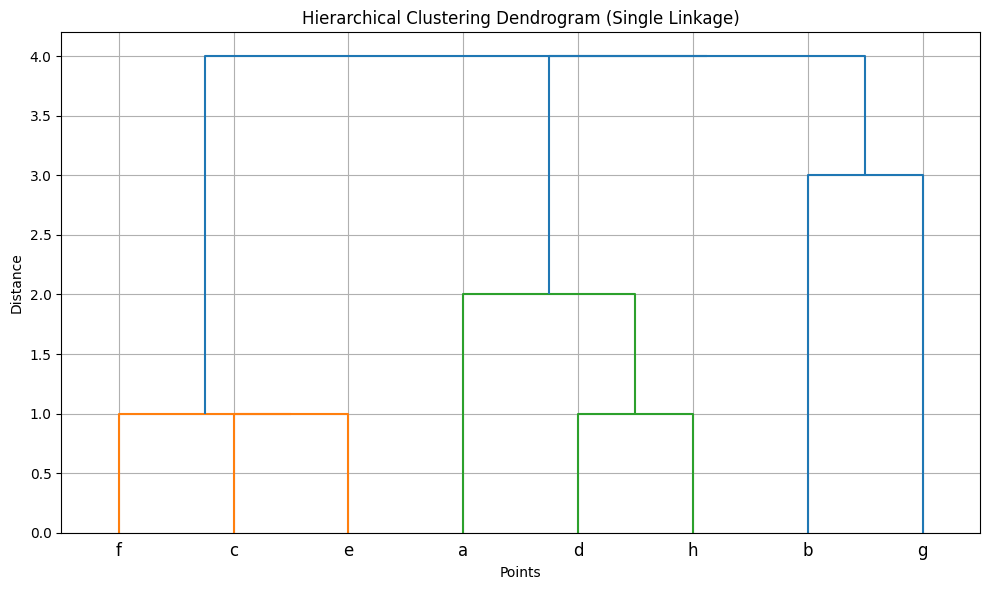

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# Load the symmetric distance matrix from CSV ===
df = pd.read_csv("/content/drive/MyDrive/CSC-587/distance_matrix2.csv", index_col=0)

# Convert to condensed distance format
# Ensure it's numeric and symmetric
dist_matrix = df.values
condensed_dist = squareform(dist_matrix)

# Perform hierarchical clustering using single linkage
linkage_matrix = linkage(condensed_dist, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df.index)
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

(b)	Determine whether a point is core based on ϵ = 6 and minPts = 2. (Recall that a point p is a core point if at least minP ts points are within distance ϵ of it (including p).)

In [15]:
import pandas as pd

# Load the symmetric distance matrix
df = pd.read_csv("/content/drive/MyDrive/CSC-587/distance_matrix2.csv", index_col=0)

# Parameters
epsilon = 6
minPts = 2

# Determine which points are core points
core_points = {}

for point in df.index:
    # Count how many distances are <= epsilon (including the point itself)
    num_neighbors = (df.loc[point] <= epsilon).sum()
    core_points[point] = (num_neighbors >= minPts)

# Results
print("Core Point Determination (ε=6, minPts=2):")
for point, is_core in core_points.items():
    print(f"Point {point}: {'Core' if is_core else 'Not Core'}")

Core Point Determination (ε=6, minPts=2):
Point a: Core
Point b: Core
Point c: Core
Point d: Core
Point e: Core
Point f: Core
Point g: Core
Point h: Core
